In [6]:
import shutil,os
import numpy as np
import pandas as pd

In [3]:
y=pd.read_csv("train/train.csv").values

In [4]:
classes=["Charmander","Bulbasaur","Pikachu"]

In [8]:
for c in classes:
    path="train/"+c
    if not path:
        os.mkdir(path)

In [17]:
names=y[:,1]
names.shape

'Pikachu'

In [21]:
#converted images datsaset into 3 folders pikachu,bulbasur,charmander
for i in range(names.shape[0]):
    path="train/Images"
    des_path="train"
    imgs=os.listdir(path)
    for i,img in enumerate(imgs):
        src=os.path.join(path,img)
        des="train/"+str(names[i])
        shutil.move(src,des)

In [1]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\Dhruv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dhruv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dhruv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dhruv\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3))) #no.of filters,size of filter
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)              

In [3]:
from keras import optimizers
adam2=optimizers.Adam(lr=1e-4)
model.compile(loss="categorical_crossentropy",optimizer=adam2,metrics=["acc"])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

image_gen=ImageDataGenerator(rescale=1/255,
                            rotation_range=40,
                            horizontal_flip=True,
                            width_shift_range=0.2,
                            height_shift_range=0.2)
imag_generator=image_gen.flow_from_directory("train",shuffle=True,batch_size=32,
                                             target_size=(100,100),class_mode='categorical')

Found 304 images belonging to 3 classes.


In [5]:
import matplotlib.pyplot as plt

(32, 100, 100, 3) (32, 3)


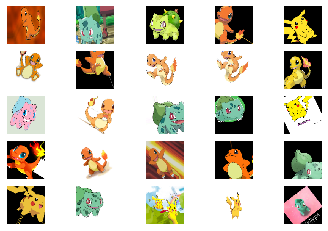

In [7]:
for x,y in imag_generator:
    print(x.shape,y.shape)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x[i])
        plt.axis("off")
    plt.show()
    break

In [24]:
class_ids=imag_generator.class_indices
class_idx=dict(class_ids)
id2class=dict((class_idx[k],k) for k in class_idx.keys())
id2class

{0: 'Bulbasaur', 1: 'Charmander', 2: 'Pikachu'}

In [31]:
hist=model.fit_generator(imag_generator,epochs=50,steps_per_epoch=10,shuffle=True)

Epoch 1/10


C:\Users\Dhruv\Anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 43s 4s/step - loss: 0.2536 - acc: 0.9375
Epoch 2/10
10/10 [==============================] - 22s 2s/step - loss: 0.2520 - acc: 0.9145
Epoch 3/10
10/10 [==============================] - 23s 2s/step - loss: 0.2929 - acc: 0.8947
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.2802 - acc: 0.9046
Epoch 5/10
10/10 [==============================] - 21s 2s/step - loss: 0.2698 - acc: 0.9178
Epoch 6/10
10/10 [==============================] - 21s 2s/step - loss: 0.2650 - acc: 0.9211
Epoch 7/10
10/10 [==============================] - 21s 2s/step - loss: 0.2351 - acc: 0.9276
Epoch 8/10
10/10 [==============================] - 22s 2s/step - loss: 0.2362 - acc: 0.9408
Epoch 9/10
10/10 [==============================] - 22s 2s/step - loss: 0.2332 - acc: 0.9342
Epoch 10/10
10/10 [==============================] - 21s 2s/step - loss: 0.2474 - acc: 0.9243


In [32]:
from keras.preprocessing import image
test_images=[]
file=pd.read_csv("test/test.csv").values
names=file[:,0]
for image_path in names:
    image_path1='C:\\Users\\Dhruv\\Desktop\\CNN Pokemon\\test\\Images\\' +str(image_path)
    img=image.load_img(image_path1,target_size=(100,100))
    images_array=image.img_to_array(img)
    test_images.append(images_array)

In [33]:
test_img=np.array(test_images,dtype='float32')/255
test_img.shape

(123, 100, 100, 3)

In [34]:
pred=model.predict_classes(test_img)

In [35]:
pred2=[]
for i in pred:
    pred2.append(id2class[i])

In [36]:
d={
    "ImageId":names,
    "NameOfPokemon":pred2
}
df=pd.DataFrame(d)
df.to_csv("pokemons.csv",index=False)